In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud as cld
import nltk
from textblob import TextBlob

In [3]:

# read all files into their respective segments
seg_1 = pd.read_csv('csv-1700-1830.csv', encoding = "ISO-8859-1", parse_dates=['date(yyyyMMddHHmmss)'])
seg_2 = pd.read_csv('csv-1831-2000.csv', encoding = "ISO-8859-1", parse_dates=['date(yyyyMMddHHmmss)'])
seg_3 = pd.read_csv('csv-2001-2131.csv', encoding = "ISO-8859-1", parse_dates=['date(yyyyMMddHHmmss)'])

# concat vertically as df
df = pd.concat([seg_1, seg_2, seg_3], ignore_index=True)

In [4]:
# check most common authors for spam
df['author'].value_counts().nlargest(10)

author
KronosQuoth              1265
Clevvah4Evah              153
megaMan                   106
AbilaPost                  72
POK                        67
HomelandIlluminations      65
truccotrucco               64
FriendsOfKronos            63
choconibbs                 50
KronosStar                 49
Name: count, dtype: int64

In [5]:
df.shape

(4063, 7)

In [6]:
# it looks like KronosQuoth posts meaningless junk
df[df['author'] == 'KronosQuoth']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
11,mbdata,2014-01-23 17:00:00,KronosQuoth,Success is walking from failure to failure wit...,NaN,NaN,NaN
12,mbdata,2014-01-23 17:00:00,KronosQuoth,A person who never made a mistake never tried ...,NaN,NaN,NaN
13,mbdata,2014-01-23 17:00:24,KronosQuoth,The only person you are destined to become is ...,NaN,NaN,NaN
14,mbdata,2014-01-23 17:00:24,KronosQuoth,Knowledge is being aware of what you can do. W...,NaN,NaN,NaN
16,mbdata,2014-01-23 17:00:55,KronosQuoth,The meaning of life is to find your gift. The ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4041,mbdata,2014-01-23 21:30:02,KronosQuoth,If you are not willing to risk the usual you w...,NaN,NaN,NaN
4042,mbdata,2014-01-23 21:30:02,KronosQuoth,The number one reason people fail in life is b...,NaN,NaN,NaN
4043,mbdata,2014-01-23 21:30:02,KronosQuoth,Change your thoughts and you change your world...,NaN,NaN,NaN
4047,mbdata,2014-01-23 21:30:25,KronosQuoth,All progress takes place outside the comfort z...,NaN,NaN,NaN


In [7]:
# a lot of Clevvah4Evah's messages are misspelled. Probably not the most reliable source
df[df['author'] == 'Clevvah4Evah']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
15,mbdata,2014-01-23 17:00:55,Clevvah4Evah,I want a job 80% mental 30% fiscal #POK #Rally...,NaN,NaN,NaN
29,mbdata,2014-01-23 17:02:21,Clevvah4Evah,Youre the penultimate girlfriend! #POK #Rally ...,NaN,NaN,NaN
85,mbdata,2014-01-23 17:08:15,Clevvah4Evah,You got low self coincidence #POK #Rally #Grammar,NaN,NaN,NaN
86,mbdata,2014-01-23 17:08:39,Clevvah4Evah,I would like to return the complement #POK #Ra...,NaN,NaN,NaN
94,mbdata,2014-01-23 17:09:32,Clevvah4Evah,GAStech said they would give me a bonus! #POK ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3838,mbdata,2014-01-23 21:16:27,Clevvah4Evah,What's the diff between would of and would've?...,NaN,NaN,NaN
3858,mbdata,2014-01-23 21:17:41,Clevvah4Evah,Stop making mute points! #POK #Rally #Grammar,NaN,NaN,NaN
3868,mbdata,2014-01-23 21:18:55,Clevvah4Evah,Don't be disinterested in the movie! #POK #Ral...,NaN,NaN,NaN
3873,mbdata,2014-01-23 21:19:25,Clevvah4Evah,Your spelling and grammer are atrotious #POK #...,NaN,NaN,NaN


In [8]:
# it seems that megaMan was on the ground at the scene, potentially a good author
df[df['author'] == 'megaMan']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
2214,mbdata,2014-01-23 19:39:40,megaMan,Run - don't walk across driveway into Gelato #...,NaN,NaN,NaN
2232,mbdata,2014-01-23 19:40:00,megaMan,Yeah van -- can't exit the backway at Gelato. ...,NaN,NaN,NaN
2240,mbdata,2014-01-23 19:40:22,megaMan,Better than expected - cops block van at Gelat...,NaN,NaN,NaN
2247,mbdata,2014-01-23 19:40:29,megaMan,So van tried a t-turn to exit; cop blocked him...,NaN,NaN,NaN
2255,mbdata,2014-01-23 19:40:41,megaMan,shot! moving behind mailbox peeking #troubleat...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3806,mbdata,2014-01-23 21:14:01,megaMan,FIRST VAN GUY OUT! ITS OVER! #TAG,NaN,NaN,NaN
3811,mbdata,2014-01-23 21:14:47,megaMan,Police are taking two van guys into waiting ca...,NaN,NaN,NaN
3821,mbdata,2014-01-23 21:15:00,megaMan,One woman one man were the hostages! #TAG,NaN,NaN,NaN
3850,mbdata,2014-01-23 21:17:11,megaMan,Hey nice win for the police - two bad guys cau...,NaN,NaN,NaN


In [9]:
# it seems that AbilaPost is a legitimate news source
df[df['author'] == 'AbilaPost']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
4,mbdata,2014-01-23 17:00:00,AbilaPost,POK rally set to take place in Abila City Park...,NaN,NaN,NaN
34,mbdata,2014-01-23 17:02:31,AbilaPost,Concerns of violence surround POK rally today ...,NaN,NaN,NaN
101,mbdata,2014-01-23 17:10:00,AbilaPost,#APD has closed Egeou St between Parla St & Pi...,NaN,NaN,NaN
129,mbdata,2014-01-23 17:11:53,AbilaPost,POK rally expected to draw in excess of 1000 p...,NaN,NaN,NaN
152,mbdata,2014-01-23 17:13:01,AbilaPost,Special guest Dr. Audrey McConnel Newman will ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3903,mbdata,2014-01-23 21:21:11,AbilaPost,Great work #APD! negotiated a peaceful end to ...,NaN,NaN,NaN
3917,mbdata,2014-01-23 21:22:00,AbilaPost,fire @dancingdolphin appears to be under contr...,NaN,NaN,NaN
3922,mbdata,2014-01-23 21:22:00,AbilaPost,#APD have still not released names of suspects...,NaN,NaN,NaN
3949,mbdata,2014-01-23 21:23:34,AbilaPost,#APD have declined to release names of hostage...,NaN,NaN,NaN


In [10]:
# it seems that POK is a legitimate source of POK news, although they don't seem to cover much other than the rally.
df[df['author'] == 'POK']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
0,mbdata,2014-01-23 17:00:00,POK,Follow us @POK-Kronos,NaN,NaN,NaN
33,mbdata,2014-01-23 17:02:31,POK,POK leader Sylvia Market taking the stage for ...,NaN,NaN,NaN
46,mbdata,2014-01-23 17:03:44,POK,Sylvia Marek is introducing the guests,NaN,NaN,NaN
96,mbdata,2014-01-23 17:10:00,POK,Show your support for the POK! Join us at the ...,NaN,NaN,NaN
120,mbdata,2014-01-23 17:11:02,POK,Special Guest at today's POK Rally in the Park...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1583,mbdata,2014-01-23 18:59:01,POK,Sylvia thanks all the speakers and the band,NaN,NaN,NaN
1633,mbdata,2014-01-23 19:02:00,POK,Photos of the POK Rally in the Park: POK.krono...,NaN,NaN,NaN
1676,mbdata,2014-01-23 19:03:48,POK,Sylvia reminds us all to make a difference eve...,NaN,NaN,NaN
1696,mbdata,2014-01-23 19:05:00,POK,Stay with us to hear Viktor-E play in the Abil...,NaN,NaN,NaN


In [11]:
# seems like another news source
df[df['author'] == 'HomelandIlluminations']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
1131,mbdata,2014-01-23 18:41:00,HomelandIlluminations,Reports coming in of a building fire at Achil...,NaN,NaN,NaN
1182,mbdata,2014-01-23 18:44:00,HomelandIlluminations,Building fire at Achilleos and Madeg. Responde...,NaN,NaN,NaN
1212,mbdata,2014-01-23 18:45:00,HomelandIlluminations,Staff reporter en route to fire at Madeg. Repo...,NaN,NaN,NaN
1229,mbdata,2014-01-23 18:45:22,HomelandIlluminations,Smoke from first two floors of Dancing Dolphin...,NaN,NaN,NaN
1237,mbdata,2014-01-23 18:45:31,HomelandIlluminations,Homeland Illumation on site. Flames visible f...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3534,mbdata,2014-01-23 20:45:00,HomelandIlluminations,Additional units have arrived at Dancing Dophi...,NaN,NaN,NaN
3594,mbdata,2014-01-23 20:50:00,HomelandIlluminations,Fire officials have begun control measures on ...,NaN,NaN,NaN
3815,mbdata,2014-01-23 21:15:00,HomelandIlluminations,"Fire officials still on site, report fire is u...",NaN,NaN,NaN
3918,mbdata,2014-01-23 21:22:00,HomelandIlluminations,Officials report fire is controlled. No word ...,NaN,NaN,NaN


In [12]:
# seems like another person on the scene, even though they had grammatical errors
df[df['author'] == 'truccotrucco']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
105,mbdata,2014-01-23 17:10:00,truccotrucco,rally time! ready for some inspiration #POK,36.052,24.852,NaN
207,mbdata,2014-01-23 17:16:00,truccotrucco,Sylvia rocks! you go girl #POKRally,36.052,24.852,NaN
233,mbdata,2014-01-23 17:18:00,truccotrucco,gotta be 3000 people here! #POK is strong,36.052,24.852,NaN
276,mbdata,2014-01-23 17:21:00,truccotrucco,lots of cops but they cant stop us #POK,36.052,24.852,NaN
296,mbdata,2014-01-23 17:22:47,truccotrucco,Lucio Jakab tells it like it is #POK #SOW,36.052,24.852,NaN
...,...,...,...,...,...,...,...
3848,mbdata,2014-01-23 21:17:11,truccotrucco,everybody's safe cops got the bad guys and the...,36.059,24.856,NaN
3869,mbdata,2014-01-23 21:19:03,truccotrucco,therye letting us goo finallly! im still shaki...,36.059,24.856,NaN
3889,mbdata,2014-01-23 21:20:50,truccotrucco,tahnks to APD standoff is over! #APDheroes,36.059,24.856,NaN
3901,mbdata,2014-01-23 21:21:11,truccotrucco,cant belive it a peaceful ending after a shoot...,36.059,24.856,NaN


In [13]:
# seems quite biased, although maybe reported properly
df[df['author'] == 'FriendsOfKronos']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
8,mbdata,2014-01-23 17:00:00,FriendsOfKronos,massive rally of POK terrorists - cops are gat...,NaN,NaN,NaN
49,mbdata,2014-01-23 17:03:44,FriendsOfKronos,how long until POK terrorists start destroying...,NaN,NaN,NaN
122,mbdata,2014-01-23 17:11:02,FriendsOfKronos,terrorist leader Sylvia Marek tring to greenwa...,NaN,NaN,NaN
133,mbdata,2014-01-23 17:11:59,FriendsOfKronos,another POK riot waiting to happend,NaN,NaN,NaN
172,mbdata,2014-01-23 17:14:47,FriendsOfKronos,what legitimate speaker would ally themself wi...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3902,mbdata,2014-01-23 21:21:11,FriendsOfKronos,one male one female terrorist surrender #POK,NaN,NaN,NaN
3914,mbdata,2014-01-23 21:21:39,FriendsOfKronos,great work APD you negotiated with terrorists ...,NaN,NaN,NaN
3937,mbdata,2014-01-23 21:23:03,FriendsOfKronos,stand off with POK terrorists ends without mor...,NaN,NaN,NaN
3948,mbdata,2014-01-23 21:23:34,FriendsOfKronos,suspects? terrorists names have not been relea...,NaN,NaN,NaN


In [14]:
# seems like junk
df[df['author'] == 'choconibbs']

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location
48,mbdata,2014-01-23 17:03:44,choconibbs,Marek - Terrorist introducing more terrorists ...,NaN,NaN,NaN
102,mbdata,2014-01-23 17:10:00,choconibbs,Lovely words - ugly person #POKRally,NaN,NaN,NaN
121,mbdata,2014-01-23 17:11:02,choconibbs,Our special guests al-Zawahiri... #POKlove,NaN,NaN,NaN
130,mbdata,2014-01-23 17:11:53,choconibbs,"""Dr Death and Lucio Anarchy"""" #POKlove""""",NaN,NaN,NaN
153,mbdata,2014-01-23 17:13:01,choconibbs,POK trying to give an aura of cred - while kid...,NaN,NaN,NaN
186,mbdata,2014-01-23 17:15:13,choconibbs,Lucio loves an army of the mindless followers ...,NaN,NaN,NaN
205,mbdata,2014-01-23 17:16:00,choconibbs,Blather-blather-blather #Lucio #POKRally,NaN,NaN,NaN
231,mbdata,2014-01-23 17:18:00,choconibbs,"""Look to crime and anarchy for fulfillment"""" #...",NaN,NaN,NaN
246,mbdata,2014-01-23 17:18:44,choconibbs,@Art They're kidnappers and probably murders ...,NaN,NaN,NaN
254,mbdata,2014-01-23 17:19:00,choconibbs,Note to APD: save time and arrest them all now...,NaN,NaN,NaN


In [15]:
# list of top authors to exclude
exclude = ['choconibbs', 'POK', 'Clevvah4Evah', 'KronosQuoth']

In [16]:
df = df[~df['author'].isin(exclude)]

In [17]:
df['author'].value_counts().nlargest(10)

author
megaMan                  106
AbilaPost                 72
HomelandIlluminations     65
truccotrucco              64
FriendsOfKronos           63
KronosStar                49
roger_roger               37
BlueVelvet                37
brain448                  35
protoGuy                  34
Name: count, dtype: int64

In [18]:
# got rid of approximately 1500 messages
df.shape

(2528, 7)

In [19]:
polarities = []
sentiments = []
bias = []

def sentiment_bias(message, sent_threshold, bias_threshold):
    text_blob = TextBlob(message)

    polarities.append(text_blob.polarity)

    if abs(text_blob.polarity) < sent_threshold:
        sentiments.append('neutral')
    elif text_blob.polarity <= -sent_threshold:
        sentiments.append('negative')
    else:
        sentiments.append('positive')

    if text_blob.subjectivity < bias_threshold:
        bias.append('unbiased')
    else:
        bias.append('biased')

for m in df['message'].tolist():
    sentiment_bias(m, 0.001, 0.1)

df['polarity'] = polarities
df['sentiment'] = sentiments
df['bias'] = bias

In [20]:
df[['negative', 'neutral', 'positive']] = pd.get_dummies(df['sentiment'])
df[['biased', 'unbiased']] = pd.get_dummies(df['bias'])

In [21]:
df['sentiment'].value_counts()

sentiment
neutral     1551
positive     551
negative     426
Name: count, dtype: int64

In [22]:
agg_5min = df.groupby(pd.Grouper(key='date(yyyyMMddHHmmss)', freq='5min'))

In [23]:
sents_5min = agg_5min[['negative', 'neutral', 'positive']].sum()
sents_5min = sents_5min.reset_index()
sents_5min['time'] = sents_5min['date(yyyyMMddHHmmss)'].apply(lambda x: (x.value - pd.to_datetime('2014-01-23 17:00:00').value) // 10**9)

In [24]:
sents_5min = pd.melt(
    sents_5min,
    id_vars=['time'],
    value_vars=['negative', 'neutral', 'positive'],
    var_name='sentiment',
    value_name='count'
)

In [25]:
import plotly.express as px

fig = px.bar(
    sents_5min,
    x='sentiment',
    y='count',
    color='sentiment',
    color_discrete_sequence=['red', 'yellow', 'green'],
    animation_frame='time',
    labels={
        'sentiment': 'Sentiment',
        'count': 'Count'
    },
    title='Sentiment Counts Throughout the Evening (5 pm to 9:30 pm)'
)
fig.update_layout(yaxis_range=[0, 150])
fig.show()

#### Peaks
We see a spike in neutral sentiment at 6300,
a spike in all sentiments at 9600
Tells us we should explore more around these times

In [26]:
# repeat the above analysis for keywords such as POK, Dancing Dolphin, etc.
dolphin_keys = ['dancing', 'dolphin', 'fire', 'apartment', 'apartments', 'dancing dolphin']
dolphin_df = df[df['message'].str.contains('|'.join(dolphin_keys), case=False)]

In [27]:
dolphin_agg_5min = dolphin_df.groupby(pd.Grouper(key='date(yyyyMMddHHmmss)', freq='5min'))

In [28]:
dolphin_sents_5min = dolphin_agg_5min[['negative', 'neutral', 'positive']].sum()
dolphin_sents_5min = dolphin_sents_5min.reset_index()
dolphin_sents_5min['time'] = dolphin_sents_5min['date(yyyyMMddHHmmss)'].apply(lambda x: (x.value - pd.to_datetime('2014-01-23 17:00:00').value) // 10**9)

In [29]:
dolphin_sents_5min = pd.melt(
    dolphin_sents_5min,
    id_vars=['time'],
    value_vars=['negative', 'neutral', 'positive'],
    var_name='sentiment',
    value_name='count'
)

In [30]:
fig = px.bar(
    dolphin_sents_5min,
    x='sentiment',
    y='count',
    color='sentiment',
    color_discrete_sequence=['red', 'yellow', 'green'],
    animation_frame='time',
    labels={
        'sentiment': 'Sentiment',
        'count': 'Count'
    },
    title='Sentiment Counts Throughout the Evening for the Dancing Dolphin (5 pm to 9:30 pm)'
)
fig.update_layout(yaxis_range=[0, 100])
fig.show()

In [31]:
POK_keys = ['POK', 'rally', 'Syliva', 'leaders', 'Protectors', '#POKRally', 'Viktor']
POK_df = df[df['message'].str.contains('|'.join(POK_keys), case=False)]

In [32]:
POK_df.shape

(433, 15)

In [33]:
POK_agg_5min = POK_df.groupby(pd.Grouper(key='date(yyyyMMddHHmmss)', freq='5min'))

In [34]:
POK_sents_5min = POK_agg_5min[['negative', 'neutral', 'positive']].sum()
POK_sents_5min = POK_sents_5min.reset_index()
POK_sents_5min['time'] = POK_sents_5min['date(yyyyMMddHHmmss)'].apply(lambda x: (x.value - pd.to_datetime('2014-01-23 17:00:00').value) // 10**9)

In [35]:
POK_sents_5min = pd.melt(
    POK_sents_5min,
    id_vars=['time'],
    value_vars=['negative', 'neutral', 'positive'],
    var_name='sentiment',
    value_name='count'
)

In [36]:
fig = px.bar(
    POK_sents_5min,
    x='sentiment',
    y='count',
    color='sentiment',
    color_discrete_sequence=['red', 'yellow', 'green'],
    animation_frame='time',
    labels={
        'sentiment': 'Sentiment',
        'count': 'Count'
    },
    title='Sentiment Counts Throughout the Evening for the Protectors of Kronos (5 pm to 9:30 pm)'
)
fig.update_layout(yaxis_range=[0, 100])
fig.show()

In [37]:
# get messages with geolocations
geo_df = df[pd.notna(df['latitude'])]

In [38]:
geo_df.head(50)

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,polarity,sentiment,bias,negative,neutral,positive,biased,unbiased
105,mbdata,2014-01-23 17:10:00,truccotrucco,rally time! ready for some inspiration #POK,36.052,24.852,NaN,0.200000,positive,biased,False,False,True,True,False
169,mbdata,2014-01-23 17:14:47,footfingers,The Asterian People's Army supports the POK in...,36.054,24.902,NaN,0.000000,neutral,unbiased,False,True,False,False,True
170,mbdata,2014-01-23 17:14:47,truthforcadau,Cant wait to hear Viktor-E! #POKRally,36.051,24.854,NaN,0.000000,neutral,unbiased,False,True,False,False,True
207,mbdata,2014-01-23 17:16:00,truccotrucco,Sylvia rocks! you go girl #POKRally,36.052,24.852,NaN,0.000000,neutral,unbiased,False,True,False,False,True
232,mbdata,2014-01-23 17:18:00,truthforcadau,lots of cops hopefully they dont do anything s...,36.051,24.854,NaN,-0.800000,negative,biased,True,False,False,True,False
233,mbdata,2014-01-23 17:18:00,truccotrucco,gotta be 3000 people here! #POK is strong,36.052,24.852,NaN,0.433333,positive,biased,False,False,True,True,False
264,mbdata,2014-01-23 17:20:00,footfingers,greedy corporations are ruining Kronos and poi...,36.054,24.902,NaN,0.000000,neutral,unbiased,False,True,False,False,True
276,mbdata,2014-01-23 17:21:00,truccotrucco,lots of cops but they cant stop us #POK,36.052,24.852,NaN,0.000000,neutral,unbiased,False,True,False,False,True
296,mbdata,2014-01-23 17:22:47,truccotrucco,Lucio Jakab tells it like it is #POK #SOW,36.052,24.852,NaN,0.000000,neutral,unbiased,False,True,False,False,True
335,mbdata,2014-01-23 17:25:00,footfingers,President Kapelou is a stooge for greeddy Teth...,36.054,24.902,NaN,0.000000,neutral,unbiased,False,True,False,False,True


In [138]:
geo_df[['message', 'latitude', 'longitude', 'date(yyyyMMddHHmmss)']].head(60)

,message,latitude,longitude,date(yyyyMMddHHmmss)
105,rally time! ready for some inspiration #POK,36.052,24.852,2014-01-23 17:10:00
169,The Asterian People's Army supports the POK in...,36.054,24.902,2014-01-23 17:14:47
170,Cant wait to hear Viktor-E! #POKRally,36.051,24.854,2014-01-23 17:14:47
207,Sylvia rocks! you go girl #POKRally,36.052,24.852,2014-01-23 17:16:00
232,lots of cops hopefully they dont do anything s...,36.051,24.854,2014-01-23 17:18:00
233,gotta be 3000 people here! #POK is strong,36.052,24.852,2014-01-23 17:18:00
264,greedy corporations are ruining Kronos and poi...,36.054,24.902,2014-01-23 17:20:00
276,lots of cops but they cant stop us #POK,36.052,24.852,2014-01-23 17:21:00
296,Lucio Jakab tells it like it is #POK #SOW,36.052,24.852,2014-01-23 17:22:47
335,President Kapelou is a stooge for greeddy Teth...,36.054,24.902,2014-01-23 17:25:00


In [39]:
geo_df.shape

(147, 15)

In [59]:
# get messages about the fire that have geolocations
fire = geo_df[geo_df['message'].str.contains('fire', 'dancing dolphin', 'dancing', 'dolphin', regex=False)]

In [62]:
fire.shape

(9, 15)

In [60]:
fire[['message', 'latitude', 'longitude']].head(10)

,message,latitude,longitude
1151,i think the dancin dolphin is on fire!,36.059,24.894
1524,Oh man they are evacuating the nearby building...,36.059,24.894
1597,Someone just got rescued and looks really bad ...,36.059,24.894
1829,Wow - more police #abilafire,36.059,24.894
1895,More fire trucks are arriving this is really bad,36.059,24.894
2049,"They are getting ready to go house to house I""...",36.059,24.894
2815,They just pulled a firefighter out on a stretc...,36.059,24.894
2900,They just put him in an ambulance #hurtfirefig...,36.059,24.894
4038,OMG was that an explosion ? #abilafire,36.059,24.894


In [126]:
# get messages about the van, crash, bicycle that contain geolocations 'van', 'hit', 'bicycle', 'pedestrian', 'run'
hit_words = ['van', 'hit', 'bicycle', 'pedestrian']
hitnrun = geo_df[geo_df['message'].str.contains(*hit_words, regex=False)]

In [127]:
hitnrun[['message', 'latitude', 'longitude']].head(14)

,message,latitude,longitude
1898,Some moron in a black van just hit my car!,36.057,24.892
1930,FREE COFFEE to anyone who caught the license p...,36.054,24.901
1942,OMG!!!!!!! Some derp in a?balck?van just?hit a...,36.054,24.901
2228,wow some crazy black van just got pulled over ...,36.059,24.856
2298,why didnt i stay at the rally? im trapped in h...,36.059,24.856
2461,looks like there are 3 cop cars and the black ...,36.059,24.856
2786,guy in the van keeps yeelling at cops cant hea...,36.059,24.856
3065,they seemed really interested in where that va...,36.057,24.892
3691,what is this guy doing? just give up and now h...,36.059,24.856
3694,crazy guy is back in the van - what is going on?,36.059,24.857


In [75]:
# get messages about the standoff, hostage situation that contain geolocations
hostage = geo_df[geo_df['message'].str.contains('standoff', 'gun', 'hostage', 'police', regex=False)]

In [76]:
hostage.shape

(25, 15)

In [147]:
hostage[['message', 'latitude', 'longitude', 'date(yyyyMMddHHmmss)']].head(25)

,message,latitude,longitude,date(yyyyMMddHHmmss)
2735,holy cow SWAt showed up this is getting crazy ...,36.059,24.857,2014-01-23 19:55:00
2744,i think the swat team has arrived hopefully st...,36.059,24.856,2014-01-23 19:55:59
2760,cant believe theres no backdoor here im ready ...,36.059,24.856,2014-01-23 19:57:00
2786,guy in the van keeps yeelling at cops cant hea...,36.059,24.856,2014-01-23 19:58:13
2907,#APD is evacuating us #standoff,36.059,24.857,2014-01-23 20:05:00
2931,i think there's a hostage - why isnt #APD doin...,36.059,24.857,2014-01-23 20:06:13
3099,should got another coffeee this is going to ta...,36.059,24.857,2014-01-23 20:13:00
3365,so bored & so scared ive never felt like this ...,36.059,24.856,2014-01-23 20:31:47
3382,i wish this was over i can barely even type an...,36.059,24.856,2014-01-23 20:32:52
3402,why dont the cops do anything? save us pls! #A...,36.059,24.856,2014-01-23 20:33:49


In [120]:
for row in range(len(hostage)):
    print('<Placemark>')
    print('\t<Point>')
    print('\t\t<coordinates>', float(hostage['longitude'].iloc[row]), ',', float(hostage['latitude'].iloc[row]), '</coordinates>')
    print('\t</Point>')
    print('\t<Style>')
    print('\t\t<IconStyle><scale>0.75</scale><color>FF195E</color></IconStyle>')
    print('\t</Style>')
    print('</Placemark>')




<Placemark>
	<Point>
		<coordinates> 24.857 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.856 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.856 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.856 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.857 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.857 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><

In [130]:
for row in range(len(hitnrun)):
    print('<Placemark>')
    print('\t<Point>')
    print('\t\t<coordinates>', float(hitnrun['longitude'].iloc[row]), ',', float(hitnrun['latitude'].iloc[row]), '</coordinates>')
    print('\t</Point>')
    print('\t<Style>')
    print('\t\t<IconStyle><scale>0.9</scale><color>FF195E</color></IconStyle>')
    print('\t</Style>')
    print('</Placemark>')

<Placemark>
	<Point>
		<coordinates> 24.892 , 36.057 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.9</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.901 , 36.054 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.9</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.901 , 36.054 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.9</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.856 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.9</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.856 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.9</scale><color>FF195E</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.856 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.9</scale><color>

In [107]:
for row in range(len(fire)):
    print('<Placemark>')
    print('\t<Point>')
    print('\t\t<coordinates>', float(fire['longitude'].iloc[row]), ',', float(fire['latitude'].iloc[row]), '</coordinates>')
    print('\t</Point>')
    print('\t<Style>')
    print('\t\t<IconStyle><scale>0.75</scale><color>FF800080</color></IconStyle>')
    print('\t</Style>')
    print('</Placemark>')

<Placemark>
	<Point>
		<coordinates> 24.894 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF800080</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.894 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF800080</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.894 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF800080</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.894 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF800080</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.894 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.75</scale><color>FF800080</color></IconStyle>
	</Style>
</Placemark>
<Placemark>
	<Point>
		<coordinates> 24.894 , 36.059 </coordinates>
	</Point>
	<Style>
		<IconStyle><scale>0.7

In [112]:
traffic_words = ['red', 'red light']
traffic = geo_df[geo_df['message'].str.contains(*traffic_words, regex=False)]

In [113]:
traffic.shape

(9, 15)

In [116]:
traffic[['message', 'latitude', 'longitude']].head()

,message,latitude,longitude
2008,This is the FIRST time anyone has been injured...,36.054,24.901
2040,"Titanium frame, carbon wheels. guy's gonna be ...",36.054,24.901
2213,Our AWESOME coffee cheered him up He's OK NOW!!,36.054,24.901
2280,never been so scared under the table in gelato...,36.059,24.856
2647,the cops are scared of the people rising up ag...,36.054,24.902


In [139]:
location_df = df[pd.notna(df[' location'])]
# deez_nuts = Cortland('balls')

In [143]:
location_df.shape

(176, 15)

In [146]:
location_df.iloc[80:120]

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,polarity,sentiment,bias,negative,neutral,positive,biased,unbiased
1397,ccdata,2014-01-23 18:49:43,NaN,TRAFFIC STOP,NaN,NaN,Rist Way / N. Desafio St,0.000000,neutral,unbiased,False,True,False,False,True
1415,ccdata,2014-01-23 18:50:21,NaN,DISTURBANCE-NOISE,NaN,NaN,2491 N. Thessalias St,0.000000,neutral,unbiased,False,True,False,False,True
1438,ccdata,2014-01-23 18:52:00,NaN,ALARM-SECURE NO CRIME,NaN,NaN,3671 N. Valmai St,0.000000,neutral,unbiased,False,True,False,False,True
1515,ccdata,2014-01-23 18:55:01,NaN,TRAFFIC STOP,NaN,NaN,N. Arbete St / N. Oddisseos St,0.000000,neutral,unbiased,False,True,False,False,True
1637,ccdata,2014-01-23 19:02:00,NaN,TRAFFIC STOP,NaN,NaN,N. Arbete St / N. Spetson St,0.000000,neutral,unbiased,False,True,False,False,True
1678,ccdata,2014-01-23 19:03:48,NaN,DISTURBANCE-NOISE,NaN,NaN,N. Hacia St / N. Carretera St,0.000000,neutral,unbiased,False,True,False,False,True
1707,ccdata,2014-01-23 19:05:54,NaN,PARK CHECK,NaN,NaN,4999 N. Parla St,0.000000,neutral,unbiased,False,True,False,False,True
1725,ccdata,2014-01-23 19:07:00,NaN,TRAFFIC STOP,NaN,NaN,N. Thermopilon St / N. Carnero St,0.000000,neutral,unbiased,False,True,False,False,True
1765,ccdata,2014-01-23 19:10:00,NaN,ALARM-SECURE NO CRIME,NaN,NaN,2727 N. Thessalias St,0.000000,neutral,unbiased,False,True,False,False,True
1807,ccdata,2014-01-23 19:14:07,NaN,MISDEMEANOR ASSAULT-IN PROGRESS,NaN,NaN,5097 N. Asiant St,0.000000,neutral,unbiased,False,True,False,False,True


In [ ]:
# perform grammar analyses. get rid of any messages that have poor grammar, i.e. Clevvah4Evvah and so forth
from language_tool_python import LanguageTool

# instantiate checker
checker = LanguageTool('en-US')


# apply checker to each message. get rid
df['grammar'] = df['message'].apply(lambda message: checker.check(message))

In [ ]:
# get rid of messages with grammatical errors !!! would remove truccotrucco
df_clean = df[df['grammer'].apply(lambda x: len(x) == 0)].copy()

In [ ]:
df_clean.shape

(1219, 8)

In [58]:
sents_5min

,time,sentiment,count
0,0,negative,5
1,300,negative,7
2,600,negative,10
3,900,negative,8
4,1200,negative,5
...,...,...,...
160,15000,positive,4
161,15300,positive,13
162,15600,positive,22
163,15900,positive,3


In [92]:
fig = px.line(
    sents_5min,
    x='time',
    y='count',
    color='sentiment',
    color_discrete_sequence=['red', 'yellow', 'green'],
    labels={
        'sentiment': 'Sentiment',
        'count': 'Count',
        'index':'Time'
    },
    title='Sentiment Counts Throughout the Evening, Along With Frequency of High-Usage Words'
)
fig.update_layout(yaxis_range=[0, 200])
fig.show()

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string


# Step 1: Tokenize Messages
stop_words = set(stopwords.words('english') + ['rt', 'abila', 'RT', 'Abila', 'AbilaPost', 'KronosStar', 'CentralBulletin', 'hi', 'Hi', 'HomelandIlluminations', 'HI'])
stop_words.update('rt', 'abila', 'abilapost', 'abilapost')
df['tokens'] = df['message'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word not in stop_words and word not in string.punctuation])

In [95]:
# Step 2: Group by Time Periods and Concatenate Messages
df_grouped = df.groupby(pd.Grouper(key='date(yyyyMMddHHmmss)', freq='5min'))['tokens'].apply(lambda x: ' '.join(' '.join(words) for words in x)).reset_index()

# Step 3: Calculate Word Frequencies
df_grouped['word_frequency'] = df_grouped['tokens'].apply(lambda x: FreqDist(word_tokenize(x)))

# Step 4: Select Top N Words
top_n = 3
top_words_overall = FreqDist()
for frequency_dist in df_grouped['word_frequency']:
    top_words_overall += frequency_dist

top_n_words = [word for word, count in top_words_overall.most_common(top_n)]

# Step 5: Create a DataFrame for Top Words
df_top_words = pd.DataFrame(index=df_grouped['date(yyyyMMddHHmmss)'], columns=top_n_words)

# Fill the DataFrame with counts for each time bin
for index, row in df_grouped.iterrows():
    time_bin = row['date(yyyyMMddHHmmss)']
    word_frequency = row['word_frequency']
    for word in top_n_words:
        df_top_words.at[time_bin, word] = word_frequency.get(word, 0)


In [80]:
fig = px.line(df_top_words,
     x=df_top_words.index, y=top_n_words, title='Top 5 Most Frequent Words Over Time',
     color_discrete_sequence=['red', 'black', 'blue'],
              labels={'index': 'Time', 'value': 'Word Count'}, line_shape='linear')

fig.show()

In [81]:
df['frequency'] = df['melted_message'].apply(get_freq)

In [83]:
most_frequent = FreqDist()
for dists in df['frequency']:
    most_frequent += dists

In [85]:
most_frequent.most_common(25)

[('rt', 84172),
 ('abila', 43659),
 ('fire', 36754),
 ('kronosstar', 32893),
 ('police', 30747),
 ('abilapost', 29708),
 ('pok', 18049),
 ('homelandilluminations', 17705),
 ('hi', 15994),
 ('apd', 15160),
 ('centralbulletin', 14093),
 ('dancing', 13906),
 ('van', 13559),
 ('dolphin', 13308),
 ('people', 11395),
 ('tag', 11009),
 ('shooting', 10061),
 ('cop', 9480),
 ('report', 9292),
 ('building', 9221),
 ('scene', 9178),
 ('gelatogalore', 8821),
 ('shots', 8621),
 ('cops', 8569),
 ('fired', 8302)]

In [88]:
agg_5min.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,polarity,sentiment,bias,negative,neutral,positive,biased,unbiased
1,mbdata,2014-01-23 17:00:00,maha_Homeland,Don't miss a moment! Follow our live coverage...,NaN,NaN,NaN,0.170455,positive,biased,False,False,True,True,False
2,mbdata,2014-01-23 17:00:00,Viktor-E,Come join us in the Park! Music tonight at Abi...,NaN,NaN,NaN,0.000000,neutral,unbiased,False,True,False,False,True
3,mbdata,2014-01-23 17:00:00,KronosStar,POK rally to start in Abila City Park. POK lea...,NaN,NaN,NaN,0.000000,neutral,biased,False,True,False,True,False
4,mbdata,2014-01-23 17:00:00,AbilaPost,POK rally set to take place in Abila City Park...,NaN,NaN,NaN,0.000000,neutral,unbiased,False,True,False,False,True
5,mbdata,2014-01-23 17:00:00,ourcountryourrights,POK rally in the park tonight! #POKrally,NaN,NaN,NaN,0.000000,neutral,unbiased,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,mbdata,2014-01-23 21:30:00,KronosStar,There has been an explosion from inside the ap...,NaN,NaN,NaN,-0.077778,negative,biased,True,False,False,True,False
4035,mbdata,2014-01-23 21:30:00,HomelandIlluminations,Explosions reported from site of Dancing Dolph...,NaN,NaN,NaN,0.000000,neutral,unbiased,False,True,False,False,True
4036,mbdata,2014-01-23 21:30:00,AbilaFireDept,Abila Fire Department reports an explosion at ...,NaN,NaN,NaN,0.000000,neutral,unbiased,False,True,False,False,True
4037,mbdata,2014-01-23 21:30:00,GreyCatCollectibles,OH NOOOOOOOOO that sounded like an explosion,NaN,NaN,NaN,0.000000,neutral,unbiased,False,True,False,False,True


KeyError: 'Column not found: date(yyyyMMddHHmmss'

In [ ]:
# WORKING KML FOR A SINGLE POINT
<Placemark>
  <Point>
    <coordinates>24.892, 36.057</coordinates>
  </Point>
</Placemark>

In [ ]:
# generate corpii with cleaned messages (no punctuation, consistent case, no stopwords)

from nltk.corpus.reader.plaintext import PlaintextCorpusReader

full = ''
for msg in df['message']:
    full += msg

In [ ]:
# create word cloud
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update('go', 'guy', 'want', 'time', 'E', 'people')

wordcloud = WordCloud(stopwords=stopwords, max_words=25, background_color='azure').generate(full)

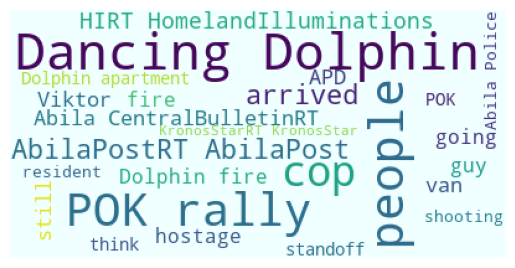

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()